In [2]:
from SHARED.vf_TR_class import *
import seaborn as sns

# model_path = "models/SAC/stochastic/scale_0.2/best_model.zip"
# env_path   = "models/SAC/stochastic/scale_0.2/vecNormEnv.pkl"

model_path = "models/SAC/deterministic/best_model_agent_11_abs.zip"
env_path = "models/SAC/deterministic/vecNormEnv_agent_11_abs.pkl"

2024-07-10 11:37:48.200469: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 11:37:48.227442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 11:37:48.227481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 11:37:48.228281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-10 11:37:48.233044: I tensorflow/core/platform/cpu_feature_guar

In [2]:

my_value_function = value_function_TR(input_dim=2,hidden_dim=128,learning_rate=1e-3,batch_size=128,reduced= True)
data_points,trajectories = my_value_function.sim_with_agent(num_traj=1000,spread=0.5,model_path=model_path, env_path=env_path, stochastic = False)

100%|██████████| 1416/1416 [00:01<00:00, 1130.97it/s]


Visualizing data points

In [3]:
print (len(my_value_function.values))
print (len(data_points))


967255
967275


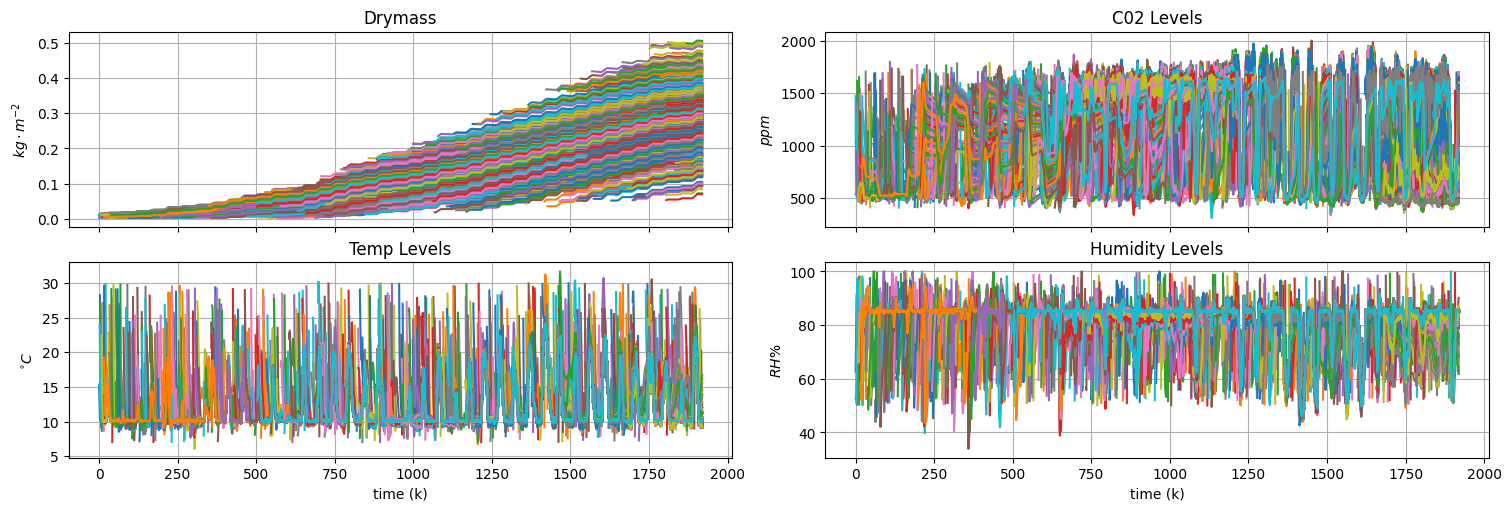

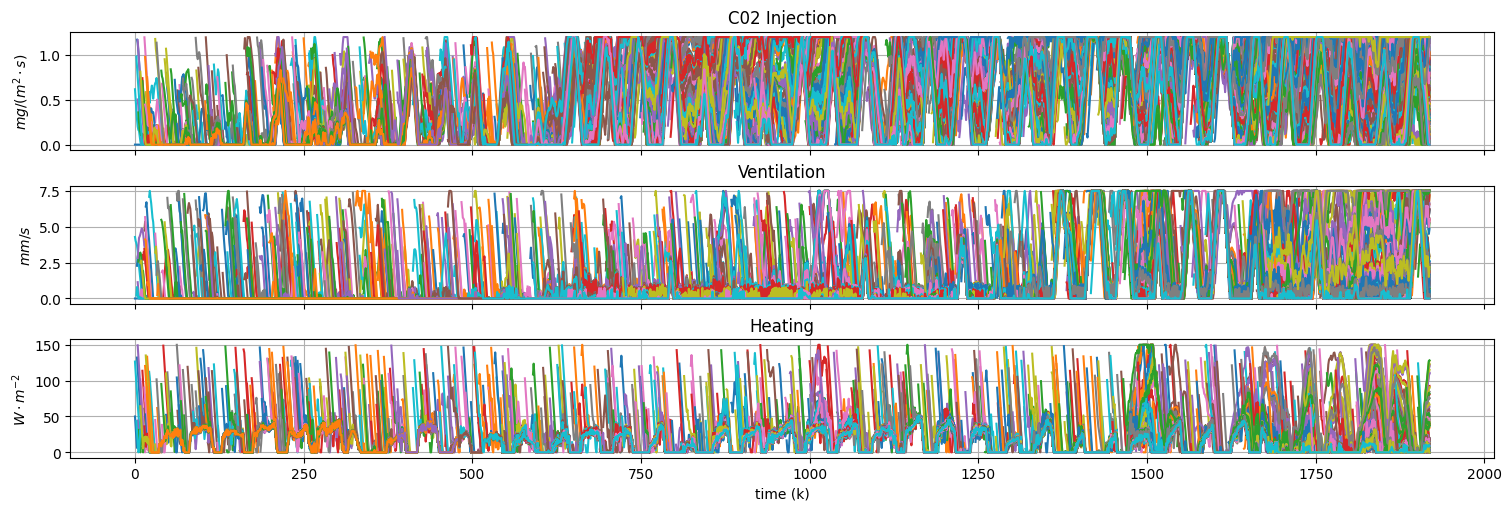

In [14]:

max_y = {}
min_y = {}

fig_states, axs_y = plt.subplots(2,2,sharex=True, sharey=False, layout='constrained',figsize=(15, 5))
fig_inputs, axs_u = plt.subplots(3,1,sharex=True, sharey=False, layout='constrained',figsize=(15, 5))
for t in trajectories:
    oo_log = []
    xx_log = []
    for (obs_norm, reward),(obs2store,oo,x_next,x_now,_) in trajectories[t]:
        oo_log.append(oo)
        xx_log.append(x_now)
    
    oo_log = np.vstack(oo_log)   
    xx_log = np.vstack(xx_log)  
    y1 = oo_log[:,0]
    y2 = oo_log[:,1]
    y3 = oo_log[:,2]
    y4 = oo_log[:,3]
    
    
    u1 = oo_log[:,4]
    u2 = oo_log[:,5]
    u3 = oo_log[:,6]
    
    k = oo_log[:,7]
    axs_y[0,0].plot (k,y1)
    axs_y[0,1].plot (k,y2)
    axs_y[1,0].plot (k,y3)
    axs_y[1,1].plot (k,y4)

    axs_u[0].plot (k,u1)
    axs_u[1].plot (k,u2)
    axs_u[2].plot (k,u3)
    
    for o in oo_log:
        if o[7] in max_y:
            if max_y[o[7]] < o[0]:
                max_y[o[7]] = o[0]
        else:
            max_y[o[7]] = o[0]
        if o[7] in min_y:
            if min_y[o[7]] > o[0]:
                min_y[o[7]] = o[0]
        else:
            min_y[o[7]] = o[0]
        
    
axs_y[0,0].grid(True)
axs_y[0,1].grid(True)
axs_y[1,0].grid(True)
axs_y[1,1].grid(True)

axs_y[0,0].set_title("Drymass")
axs_y[0,1].set_title("C02 Levels")
axs_y[1,0].set_title("Temp Levels")
axs_y[1,1].set_title("Humidity Levels")

axs_u[0].set_title("C02 Injection")
axs_u[1].set_title("Ventilation")
axs_u[2].set_title("Heating")



axs_y[0,0].set_ylabel("$kg \cdot m^{-2}$")
axs_y[0,1].set_ylabel("$ppm$")
axs_y[1,0].set_ylabel("$^{\circ}C$")
axs_y[1,0].set_xlabel("time (k)")
axs_y[1,1].set_ylabel("$RH \%$")
axs_y[1,1].set_xlabel("time (k)")

axs_u[0].grid(True)
axs_u[1].grid(True)
axs_u[2].grid(True)


axs_u[0].set_ylabel("$mg/(m^{2} \cdot s)$")
axs_u[1].set_ylabel("$mm/s$")
axs_u[2].set_ylabel("$W \cdot m^{-2}$")
axs_u[2].set_xlabel("time (k)")


plt.show()
fig_states.savefig('TU Delft Thesis/figures/sampled_states_TR_new.png', format='png',dpi = 200)
fig_inputs.savefig('TU Delft Thesis/figures/sampled_inputs_TR_new.png', format='png', dpi = 200)

[0.0035     0.0034992  0.00349847 ... 0.3075209  0.30746868 0.3074162 ]


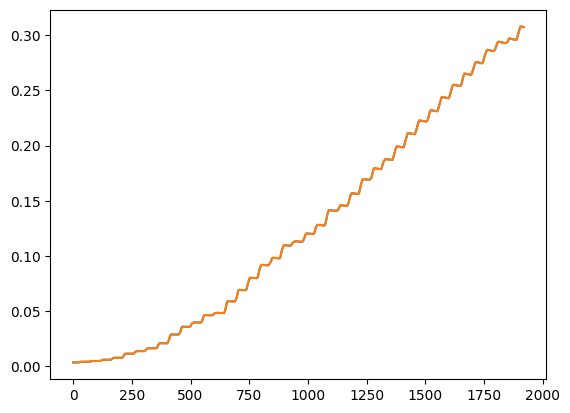

In [17]:
plt.plot(min_y.keys(),min_y.values())
plt.plot(max_y.keys(),max_y.values())

print ((np.array(list(max_y.values()))))

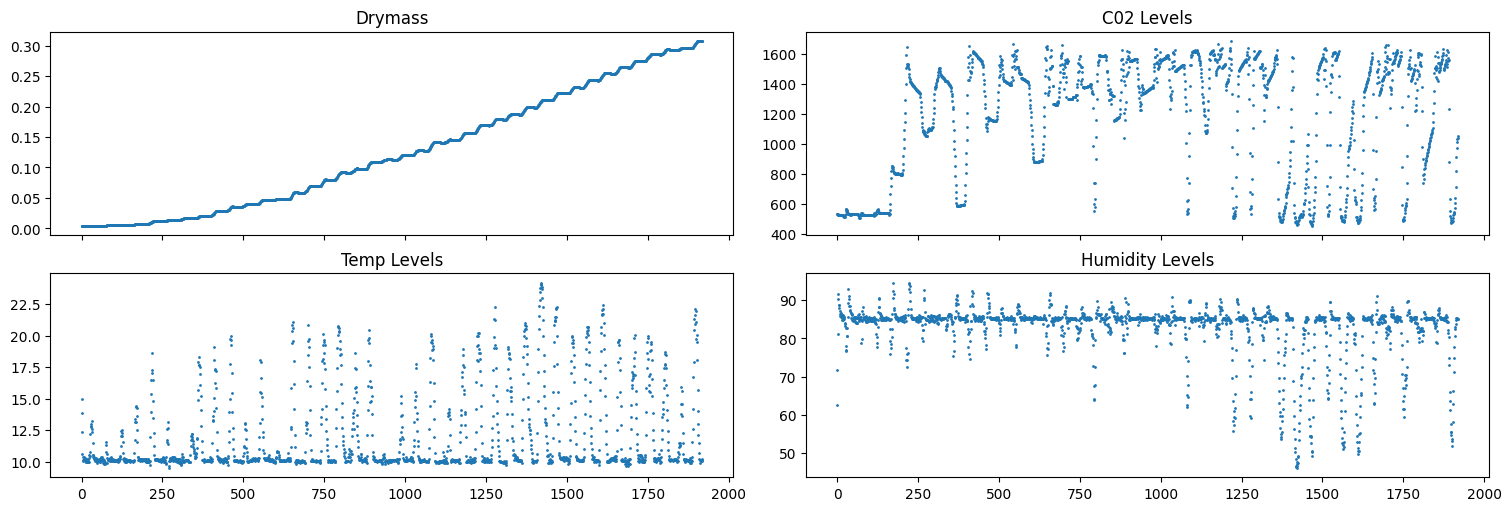

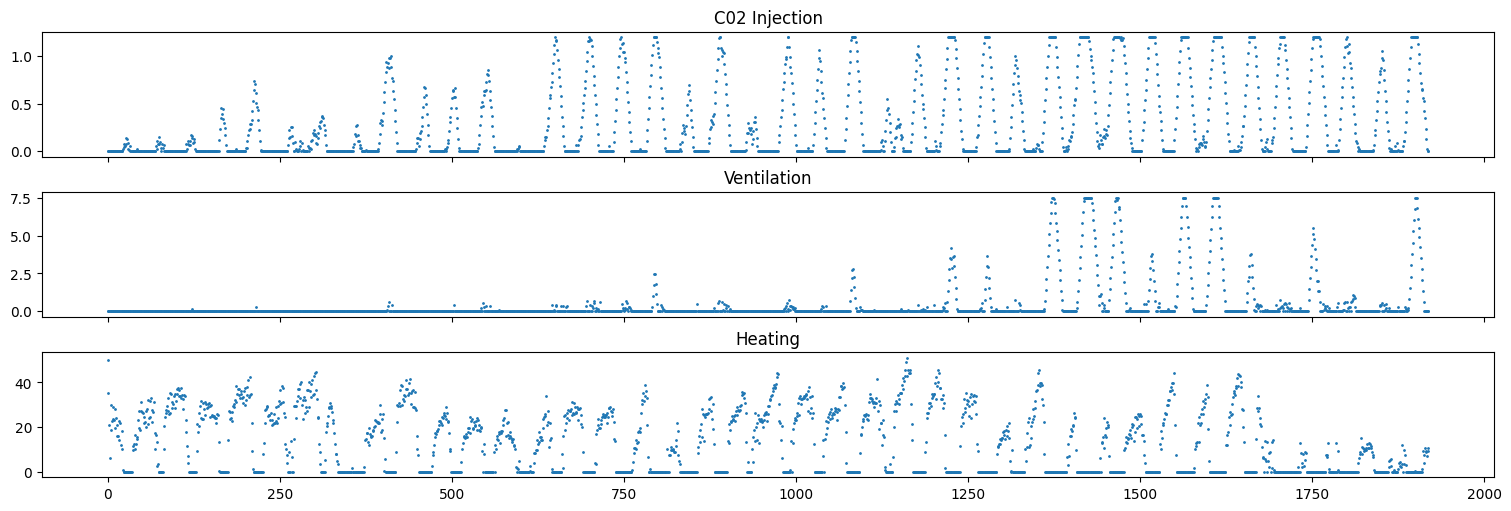

In [18]:
data_points = np.vstack(data_points)
y1 = data_points[:,0]
y2 = data_points[:,1]
y3 = data_points[:,2]
y4 = data_points[:,3]

u1 = data_points[:,4]
u2 = data_points[:,5]
u3 = data_points[:,6]

time = data_points[:,7]

fig, axs_y = plt.subplots(2,2,sharex=True, sharey=False, layout='constrained',figsize=(15, 5))

axs_y1 = axs_y[0,0]
axs_y1.set_title("Drymass")
axs_y1.scatter(time,y1, s = 1)

axs_y2 = axs_y[0,1]
axs_y2.set_title("C02 Levels")
axs_y2.scatter(time,y2, s = 1)

axs_y3 = axs_y[1,0]
axs_y3.set_title("Temp Levels")
axs_y3.scatter(time,y3, s = 1)

axs_y4 = axs_y[1,1]
axs_y4.set_title("Humidity Levels")
axs_y4.scatter(time,y4, s = 1)


fig, axs_u = plt.subplots(3,1,sharex=True, sharey=False, layout='constrained',figsize=(15, 5))
axs_u1 = axs_u[0]
axs_u1.set_title("C02 Injection")
axs_u1.scatter(time,u1, s = 1)

axs_u2 = axs_u[1]
axs_u2.set_title("Ventilation")
axs_u2.scatter(time,u2, s = 1)

axs_u3 = axs_u[2]
axs_u3.set_title("Heating")
axs_u3.scatter(time,u3, s = 1)

In [19]:
my_vf = value_function_TR(input_dim=2,hidden_dim=8,learning_rate=1e-3,batch_size=1024, reduced= True)
my_vf.values  = copy.deepcopy(my_value_function.values)
my_vf.trajectories = copy.deepcopy(my_value_function.trajectories)
print (len(my_vf.values))
my_vf.train(epochs=200)

965234
Total training iterations:151000


In [20]:
save_path = "models/VF/Deterministic/SpeedUp/agent_11_abs_tr_8_shallow.zip"
torch.save (my_vf.neural_net,save_path)

100%|██████████| 1920/1920 [00:01<00:00, 1134.16it/s]


----------------------------  -----------
EPI                (EURO/m2)     4.96257
Total growth       (kg/m2)       0.303865
Total C02 usage    (kg/m2)       1.05686
Total Heating      (kWh)        12.55
Computational Time (s)
Temp violations    (deg)       110.007
C02 violations     (ppm)      3311.43
FINAL PERFORMANCE                4.2683
----------------------------  -----------


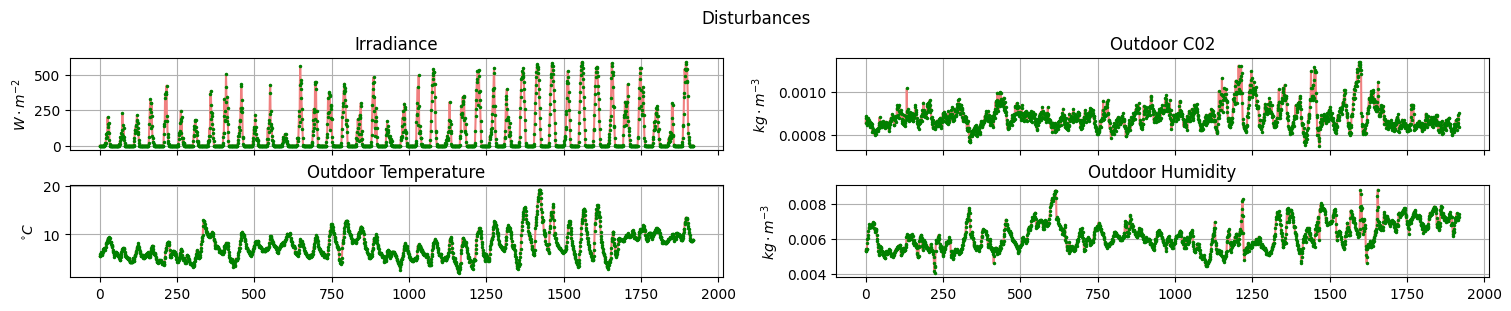

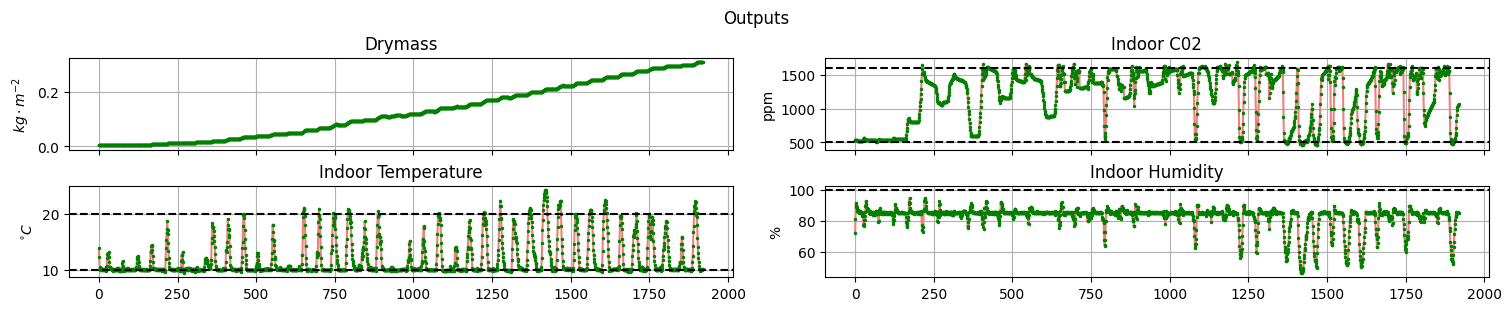

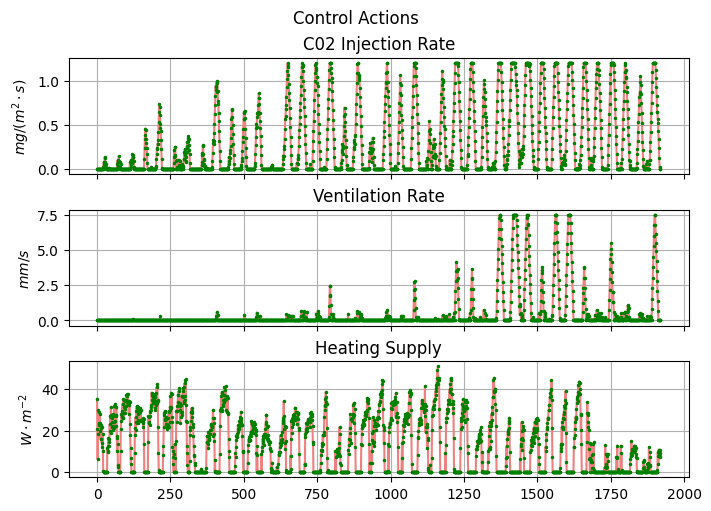

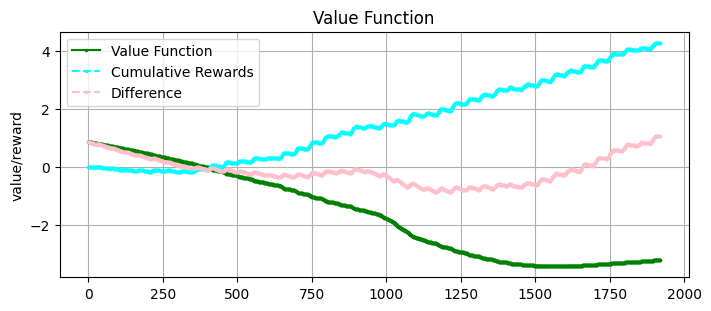

In [5]:
model_path = "models/SAC/deterministic/best_model_agent_11_abs.zip"
env_path   = "models/SAC/deterministic/vecNormEnv_agent_11_abs.pkl"
my_vf = value_function_TR(input_dim=2,hidden_dim=128,learning_rate=1e-3,batch_size=1024,reduced= True)
# my_vf.neural_net = torch.load("models/VF/Deterministic/SpeedUp/agent_11_abs_tr_8_shallow.zip")
my_vf.neural_net = torch.load("models/VF/Deterministic/agent_11_abs_tr_deep_reduced.zip")
Y_log,_,_,_ = my_vf.test_with_agent(test_episodes=1,spread=0.5, model_path=model_path, env_path=env_path, stochastic=False)
y1_main = Y_log[:,0]

In [2]:
deep_full    = "models/VF/Deterministic/agent_11_abs_tr_deep_full.zip"
deep_less    = "models/VF/Deterministic/agent_11_abs_tr_deep_less.zip"
shallow_full = "models/VF/Deterministic/agent_11_abs_tr_shallow_full.zip"
deep_reduced = "models/VF/Deterministic/agent_11_abs_tr_deep_reduced.zip"

deep_005    = "models/VF/Deterministic/agent_0.05_tr_deep_reduced.zip"
deep_01    = "models/VF/Deterministic/agent_0.1_tr_deep_reduced.zip"
deep_02  = "models/VF/Deterministic/agent_0.2_tr_deep_reduced.zip"

model_path = "models/SAC/deterministic/best_model_agent_11_abs.zip"
env_path = "models/SAC/deterministic/vecNormEnv_agent_11_abs.pkl"



# model_path = "models/SAC/stochastic/scale_0.05/best_model.zip"
# env_path   = "models/SAC/stochastic/scale_0.05/vecNormEnv.pkl"
my_vf1 = value_function_TR(input_dim=2,hidden_dim=128,learning_rate=1e-3,batch_size=1024,reduced=False,hidden_layers=2)
my_vf1.neural_net = torch.load(deep_full)

# model_path = "models/SAC/stochastic/scale_0.1/best_model.zip"
# env_path   = "models/SAC/stochastic/scale_0.1/vecNormEnv.pkl"
my_vf2 = value_function_TR(input_dim=2,hidden_dim=32,learning_rate=1e-3,batch_size=1024,reduced=False,hidden_layers=2)
my_vf2.neural_net = torch.load(deep_less)

# model_path = "models/SAC/stochastic/scale_0.2/best_model.zip"
# env_path   = "models/SAC/stochastic/scale_0.2/vecNormEnv.pkl"
my_vf3 = value_function_TR(input_dim=2,hidden_dim=128,learning_rate=1e-3,batch_size=1024,reduced=False,hidden_layers=1)
my_vf3.neural_net = torch.load(shallow_full)

my_vf4 = value_function_TR(input_dim=2,hidden_dim=128,learning_rate=1e-3,batch_size=1024, reduced= True,hidden_layers=2)
my_vf4.neural_net = torch.load(deep_reduced)


# print (my_vf3.neural_net)

# model_path = "models/SAC/stochastic/scale_0.05/best_model.zip"
# env_path   = "models/SAC/stochastic/scale_0.05/vecNormEnv.pkl"
# Y_log1,_,r1,v1 = my_vf1.test_with_agent(test_episodes=1,spread=0.5,startk=1820,model_path = model_path,env_path = env_path,stochastic=True)

# model_path = "models/SAC/stochastic/scale_0.1/best_model.zip"
# env_path   = "models/SAC/stochastic/scale_0.1/vecNormEnv.pkl"
# Y_log2,_,r2,v2 = my_vf2.test_with_agent(test_episodes=1,spread=0.5,startk=1820,model_path = model_path,env_path = env_path,stochastic=True)

# # model_path = "models/SAC/stochastic/scale_0.2/best_model.zip"
# # env_path   = "models/SAC/stochastic/scale_0.2/vecNormEnv.pkl"
# Y_log3,_,r3,v3 = my_vf3.test_with_agent(test_episodes=1,spread=0.5,startk=1820,model_path = model_path,env_path = env_path,stochastic=True)

# # 1820
# Y_log4,_,r4,v4 = my_vf4.test_with_agent(test_episodes=1,spread=0.5,startk=1820,model_path = model_path,env_path = env_path,stochastic=True)


# directory = 'results/VF4/'
# os.makedirs(directory, exist_ok=True)
# savetxt(os.path.join(directory, 'Y_log_short.csv'), Y_log4, delimiter=',')
# savetxt(os.path.join(directory, 'r_log_short.csv'), r4, delimiter=',')
# savetxt(os.path.join(directory, 'v_log_short.csv'), v4, delimiter=',')


/tmp/ipykernel_20420/853607493.py:56: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


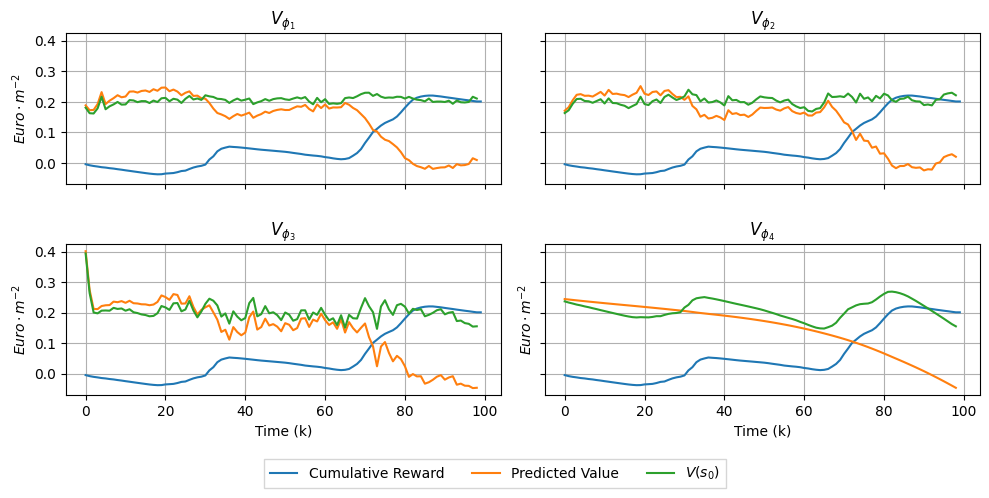

In [13]:
v = {}
r = {}

v[0] = loadtxt("results/VF1/v_log_short.csv", delimiter=',')
v[1] = loadtxt("results/VF2/v_log_short.csv", delimiter=',')
v[2] = loadtxt("results/VF3/v_log_short.csv", delimiter=',')
v[3] = loadtxt("results/VF4/v_log_short.csv", delimiter=',')

r[0] = loadtxt("results/VF1/r_log_short.csv", delimiter=',')
r[1] = loadtxt("results/VF2/r_log_short.csv", delimiter=',')
r[2] = loadtxt("results/VF3/r_log_short.csv", delimiter=',')
r[3] = loadtxt("results/VF4/r_log_short.csv", delimiter=',')

fig, axs = plt.subplots(2,2, sharex=True, sharey=True, layout='constrained', figsize=(10, 5))

ax_v1 = axs[0,0]
ax_v2 = axs[0,1]
ax_v3 = axs[1,0]
ax_v4 = axs[1,1]

ax_v1.plot (r[0], label = "Cumulative Reward")
ax_v1.plot (v[0][1:], label = "Predicted Value")
ax_v1.plot (r[0][1:]+v[0][1:], label = "$V(s_0)$")
ax_v1.grid()
# ax_v1.set_xlabel("Time (k)")
ax_v1.set_ylabel ("$Euro \cdot m^{-2}$")
ax_v1.set_title("$V_{\phi_1}$")


ax_v2.plot (r[1], label = "Cumulative Reward")
ax_v2.plot (v[1][1:], label = "$Value predictions")
ax_v2.plot (r[1][1:]+v[1][1:], label = "$Value predictions")
ax_v2.grid()
ax_v2.set_title("$V_{\phi_2}$")
# ax_v2.set_xlabel("Time (k)")
# ax_v2.set_ylabel ("$Euro \cdot m^{-2}$")

ax_v3.plot (r[2][:], label = "Cumulative Reward")
ax_v3.plot (v[2][1:], label = "$Value predictions")
ax_v3.plot (r[2][1:]+v[2][1:], label = "$Value predictions")
ax_v3.grid()
ax_v3.set_xlabel("Time (k)")
ax_v3.set_ylabel ("$Euro \cdot m^{-2}$")
ax_v3.set_title("$V_{\phi_3}$")

ax_v4.plot (r[3][:], label = "Cumulative Reward")
ax_v4.plot (v[3][1:], label = "$Value predictions")
ax_v4.plot (r[3][1:]+v[3][1:], label = "Value predictions")
ax_v4.grid()
ax_v4.set_xlabel("Time (k)")
ax_v4.set_title("$V_{\phi_4}$")
ax_v4.set_ylabel ("$Euro \cdot m^{-2}$")

handles, labels = ax_v1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.2, hspace=0.4)

plt.savefig('TU Delft Thesis/figures/vf_time_predictions_short.pdf', format='pdf')
plt.show()



In [22]:
y1_main.shape

(1920,)

In [8]:
'''Growth rate'''
from SHARED.vf_TR_class import *
import seaborn as sns

model_path = "models/SAC/deterministic/best_model_agent_11_abs.zip"
env_path   = "models/SAC/deterministic/vecNormEnv_agent_11_abs.pkl"



max_growth = 0.5
min_growth = 0
growth_range = np.linspace(min_growth,max_growth,200)

env = greenhouseEnv()
env.random_starts = False
env.stochastic = False
env.using_mpc = False  
obs, _ =env.reset()

env_norm = greenhouseEnv(use_growth_dif=False)
env_norm = DummyVecEnv([lambda: env_norm])
env_norm = VecNormalize(env_norm, norm_obs = True, norm_reward = False, clip_obs = 10.,gamma=1)
env_norm = env_norm.load(env_path,env_norm)
env_norm.training = False


bounds_min, bounds_max = [],[]
def vf_heatmap():
    vf_grid1 = np.zeros((len(growth_range),max_steps))
    # vf_grid2 = np.zeros((len(growth_range),max_steps))
    # vf_grid3 = np.zeros((len(growth_range),max_steps))
    for i in range(max_steps):
        bounds_min.append( (y1_main[i]*(1-0.8) - 0.01)*1000)
        bounds_max.append( (y1_main[i]*(1+0.7) + 0.01)*1000)
        # y_min = y1_main[i]*(1-0.8) - 0.01
        # y_max = y1_main[i]*(1+0.7) + 0.01   
        for indx,growth in enumerate(growth_range):
            
            obs = np.array([0,1500,15,90,0.5,1,30,0,250,0.0009,10,0.006])
            obs[0] = growth
            obs[7] = i
            

            
            # if growth < y_max and growth> y_min:
            obs_norm = env_norm.normalize_obs(obs)
            obs2store = obs_norm
            # obs2store = normalizeState(np.array([obs[0],obs[7]]),np.array([x_min[0],0]), np.array([x_max[0],max_steps]))
            # value1= my_vf3.evaluate_value(obs2store)         
            # value2= my_vf2.evaluate_value(obs2store) 
            # value3= my_vf3.evaluate_value(obs2store) 
            # else:
            #     value = None
            
            # vf_grid1[indx][i] = value1
            # vf_grid2[indx][i] = value2
            # vf_grid3[indx][i] = value3
    
    # directory = 'results/VF3/'
    # os.makedirs(directory, exist_ok=True)
    # savetxt(os.path.join(directory, 'heatmap.csv'), vf_grid1, delimiter=',')
      # Determine the global min and max values for the color scale
    # vmin = min(vf_grid1.min(), vf_grid1.min(), vf_grid1.min())
    # vmax = max(vf_grid1.max(), vf_grid1.max(), vf_grid1.max())
            
    # mask = np.arange(len(growth_range)) % 20 == 0
    # yticks = np.where(mask, np.round(growth_range,3), None)



    # fig, axs = plt.subplots(3, 1, figsize=(8, 8),sharex=True, sharey=True)
    # ax1 = sns.heatmap(vf_grid1, yticklabels=yticks,cbar_kws={'label': 'Expected Return'},ax=axs[0],vmin=vmin, vmax=vmax)

    # plt.subplot(3, 1, 1)  # 1 row, 1 column, first subplot
    # ax2 = sns.heatmap(vf_grid2, yticklabels=yticks,cbar_kws={'label': 'Expected Return'},ax=axs[1],vmin=vmin, vmax=vmax)
    
    # plt.subplot(3, 1, 1)  # 1 row, 1 column, first subplot
    # ax3 = sns.heatmap(vf_grid3, yticklabels=yticks,cbar_kws={'label': 'Expected Return'},ax=axs[2],vmin=vmin, vmax=vmax)
    # ax.set_xlabel("Time (k)")
    # ax.set_ylabel("Drymass ($g \cdot (m^{-2})$")
    
    # def find_closest_index(value, array):
    #     return np.abs(array - value).argmin()

    # # Normalize and plot bounds_min and bounds_max lines
    # bounds_min_indices = [find_closest_index(b, growth_range*1000) for b in bounds_min]
    # bounds_max_indices = [find_closest_index(b, growth_range*1000) for b in bounds_max]
    
    # bounds_min_indices3 = [find_closest_index(b, growth_range*1000) for b in np.array(list(min_y.values()))*1000]
    # bounds_max_indices3 = [find_closest_index(b, growth_range*1000) for b in np.array(list(max_y.values()))*1000]

    # ax1.plot(np.arange(max_steps), bounds_min_indices, color=(0.6, 1.0, 0.6), label='Sample Space min')
    # ax1.plot(np.arange(max_steps), bounds_max_indices, color='yellow', label='Sample Space max')
    # ax2.plot(np.arange(max_steps), bounds_min_indices, color=(0.6, 1.0, 0.6), label='Sample Space min')
    # ax2.plot(np.arange(max_steps), bounds_max_indices, color='yellow', label='Sample Space max')
    # ax3.plot(np.arange(max_steps), bounds_min_indices, color=(0.6, 1.0, 0.6), label='Sample Space min')
    # ax3.plot(np.arange(max_steps), bounds_max_indices, color='yellow', label='Sample Space max')
    # # ax.title("$")
    # # plt.legend()    
    # # ax.pl
    # ax1.invert_yaxis()  # Invert y-axis on the heatmap object
    # ax2.invert_yaxis()  # Invert y-axis on the heatmap object
    # ax3.invert_yaxis()  # Invert y-axis on the heatmap object
    
    # ax1.set_ylabel("Dry mass ($g \cdot m^{-2})$")
    # ax2.set_ylabel("Dry mass ($g \cdot m^{-2})$")
    # ax3.set_ylabel("Dry mass ($g \cdot m^{-2})$")
    
    # ax1.set_title ("$\delta = 5\%$")
    # ax2.set_title ("$\delta = 10\%$")
    # ax3.set_title ("$\delta = 20\%$")
    
    # ax3.set_xlabel("Time (k)")
    
    # handles, labels = ax1.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.45, -0.00), fancybox=False, shadow=False, ncol = 4)
    # plt.tight_layout()
    # fig.subplots_adjust(bottom=0.14, hspace=0.2)


# fig, ax = plt.subplots()
vf_heatmap()


# plt.savefig('TU Delft Thesis/figures/vf_heatmap_stochastic.png', format='png',dpi =200)
# plt.show()

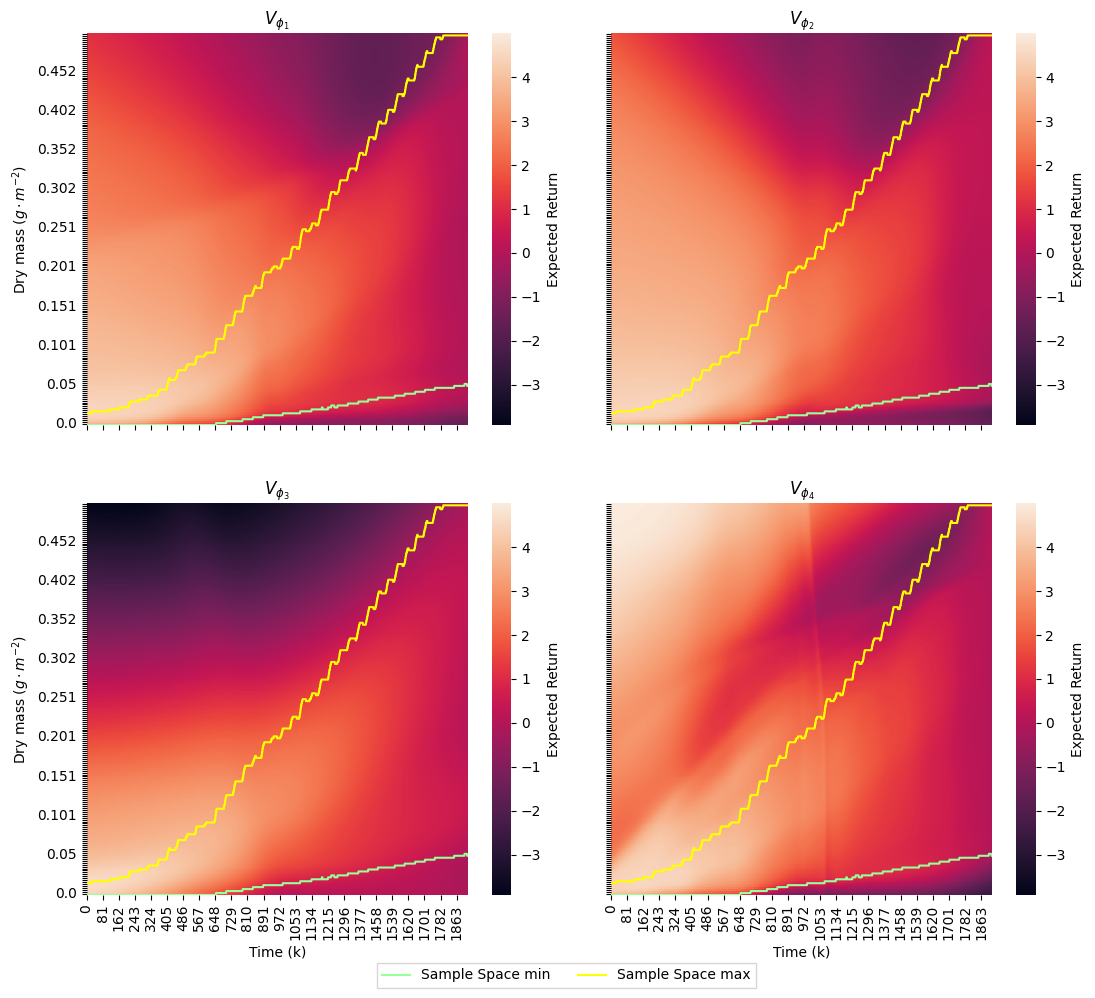

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
h1 = np.loadtxt("results/VF1/heatmap.csv", delimiter=',')
h2 = np.loadtxt("results/VF2/heatmap.csv", delimiter=',')
h3 = np.loadtxt("results/VF3/heatmap.csv", delimiter=',')
h4 = np.loadtxt("results/VF4/heatmap.csv", delimiter=',')


# Combine all data to find the common vmin and vmax
data_combined = np.concatenate([h1.flatten(), h2.flatten(), h3.flatten(), h4.flatten()])
vmin = np.min(data_combined)
vmax = np.max(data_combined)


# Set growth range and yticks
max_growth = 0.5
min_growth = 0
growth_range = np.linspace(min_growth, max_growth, 200)
mask = np.arange(len(growth_range)) % 20 == 0
yticks = np.where(mask, np.round(growth_range, 3), '')


def find_closest_index(value, array):
    return np.abs(array - value).argmin()

# Normalize and plot bounds_min and bounds_max lines
bounds_min_indices = [find_closest_index(b, growth_range*1000) for b in bounds_min]
bounds_max_indices = [find_closest_index(b, growth_range*1000) for b in bounds_max]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

# Titles and labels
titles = [r'$V_{\phi_1}$', r'$V_{\phi_2}$', r'$V_{\phi_3}$', r'$V_{\phi_4}$']
for i, ax in enumerate(axs.flat):
    ax.set_title(titles[i])
    ax.plot(np.arange(max_steps), bounds_min_indices, color=(0.6, 1.0, 0.6), label='Sample Space min')
    ax.plot(np.arange(max_steps), bounds_max_indices, color='yellow', label='Sample Space max')

# Plot heatmaps
sns.heatmap(h1, ax=axs[0, 0], yticklabels=yticks, cbar_kws={'label': 'Expected Return'},vmin=vmin, vmax=vmax).invert_yaxis()
sns.heatmap(h2, ax=axs[0, 1], yticklabels=yticks, cbar_kws={'label': 'Expected Return'},vmin=vmin, vmax=vmax).invert_yaxis()
sns.heatmap(h3, ax=axs[1, 0], yticklabels=yticks, cbar_kws={'label': 'Expected Return'},vmin=vmin, vmax=vmax).invert_yaxis()
sns.heatmap(h4, ax=axs[1, 1], yticklabels=yticks, cbar_kws={'label': 'Expected Return'},vmin=vmin, vmax=vmax).invert_yaxis()

axs[0, 0].set_ylabel("Dry mass ($g \cdot m^{-2})$")
axs[1, 0].set_ylabel("Dry mass ($g \cdot m^{-2})$")
axs[1, 0].set_xlabel("Time (k)")
axs[1, 1].set_xlabel("Time (k)")

plt.tight_layout()
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.55, -0.00), fancybox=False, shadow=False, ncol = 4)
fig.subplots_adjust(bottom=0.1,wspace=0.1,hspace=0.2, left = 0.15)
plt.show()
fig.savefig('TU Delft Thesis/figures/vf_heatmap_deterministic.png', format='png',dpi =200)